### Top Ten Most Frequent Words in Hamlet

The following script finds the ten most frequent words in Shakespeare's Hamlet. Many times top ten analyses are used to find the top ten words overall, but this particular script strips out stopwords so the resulting top ten words shed light on the top ten thematic words in the text.


### Global parameters 

You will need to have set up a [Karst account](https://kb.iu.edu/d/bezu#account) first. Once you have your Karst account and have set up access to Karst Desktop through thinlinc (see [textPrep.ipynb](https://github.com/cyberdh/Text-Analysis/blob/master/RNotebooks/textPrep.ipynb)), login to KD through the thinlinc client and go to Applications>Analytics>rstudio to launch R Studio.  Next, set the working directory by pointing to the location on Karst where you have stored the files. Below, we have chosen to save the folder "Text-Analysis" as a "Project" in R Studio on the Karst super-computer here at Indiana University. It contains the R scripts, texts, notebooks, and results. If you have forked and cloned the Github repository (see [textPrep.ipynb](https://github.com/cyberdh/Text-Analysis/blob/master/RNotebooks/textPrep.ipynb) for directions on how), simply point to where you have saved the folder. If you save it to your personal Karst folder, it will most likely look very similar to the example below. Karst is a unix server and so the home directory is represented by a ~ and, thus, the path will look like this "~/Text-Analysis/" (with the quotes). Alternatively, if you are on a PC, you will need to use an absolute path such as "C:/Users/XXX" (with the quotes again).

In R Studio, click Session in the menu bar > Set Working Directory > Choose Directory, then select the Text-Analysis directory in which you are working. This will set your working directory in the console pane, but make sure to copy the path into the source pane above to keep the directory constant if you close this script and reopen later. Make sure you click on the blue cube with a "R" in the center to set your working directory to your Text-Analysis project path.

HINT: Your working directory is the folder from which you will be pulling your texts.

In [24]:
setwd("~/Text-Analysis")

### Include necessary packages for notebook 

R's extensibility comes in large part from packages. Packages are groups of functions, data, and algorithms that allow users to easily carry out processes without recreating the wheel. Some packages are included in the basic installation of R, others created by R users are available for download. Make sure to have the following packages installed before beginning so that they can be accessed while running the scripts.

In R Studio, packages can be installed by navigating to Tools in the menu bar > Install Packages. Or in the bottom right panel click on the "packages" tab and then click on "install."

These packages are used within the top ten frequency script:

NLP - Basic classes and methods for Natural Language Processing.

tm - this package provides tools (functions) for performing various types of text mining. In this script, we will use tm to performing text cleaning in order to have uniform data for analysis. Check out [this link](https://cran.r-project.org/web/packages/tm/vignettes/tm.pdf) for the documentation!

In [25]:
library(NLP)
library(tm)

### Scan in the text

Uses R's "scan" function to read in the text and is then saved as a variable called "text_raw"

In [32]:
text_raw<-scan("data/StarTrekNextGen/series/277.txt", what="character", sep="\n")

### Save the text as a corpus object

The "Corpus" function from tm reads in the vector we scanned earlier and saves it as a corpus object.

In [33]:
corpus <- Corpus(VectorSource(text_raw))

### Clean the corpus

To clean the corpus in this example, we are using the tm package's built in tools to:
1) lowercase all words so that "Lake" and "lake" are recognized as the same string,
2) build a stopword list that uses a standard English list concatenated with an Early Modern list that has words like "hath" and "thy" in it,
3) remove punctuation as it is not germane to this analysis
4) strip out any whitespace between words to get rid of empty elements.

In [34]:
corpus <- tm_map(corpus, content_transformer(tolower))
#Add early modern stopwords by adding "myStopWords" 
myStopWords <- scan("data/earlyModernStopword.txt", what="character", sep="\n")
#To change the stopword list, use other dictionaries available with the tm package
corpus <- tm_map(corpus, removeWords, c(stopwords("english"), myStopWords))
corpus <- tm_map(corpus, removePunctuation)
corpus <- tm_map(corpus, stripWhitespace)

### Processing

After the corpus has been cleaned, we can now begin to process the text. The next step uses the DocumentTermMatrix() function again from the tm package. This function creates a matrix where each document is a row and the terms in the text make up the columns, saved here as "dtm." The rest of the matrix consists of the frequencies for each term within each document.

In [35]:
dtm <- DocumentTermMatrix(corpus)

Once we've created the Document-Term Matrix, we need to find the overall frequency of each term across the corpus. Here, we get the sums of the columns (colSums) within the Document-Term Matrix and save it as a sorted numeric vector called "freq."

In [36]:
freq <- sort(colSums(as.matrix(dtm)), decreasing = TRUE)

### Results

Finally, we can plot and view the data as a bar graph with the top ten words along the x-axis and the frequency of appearance along the y-axis. 

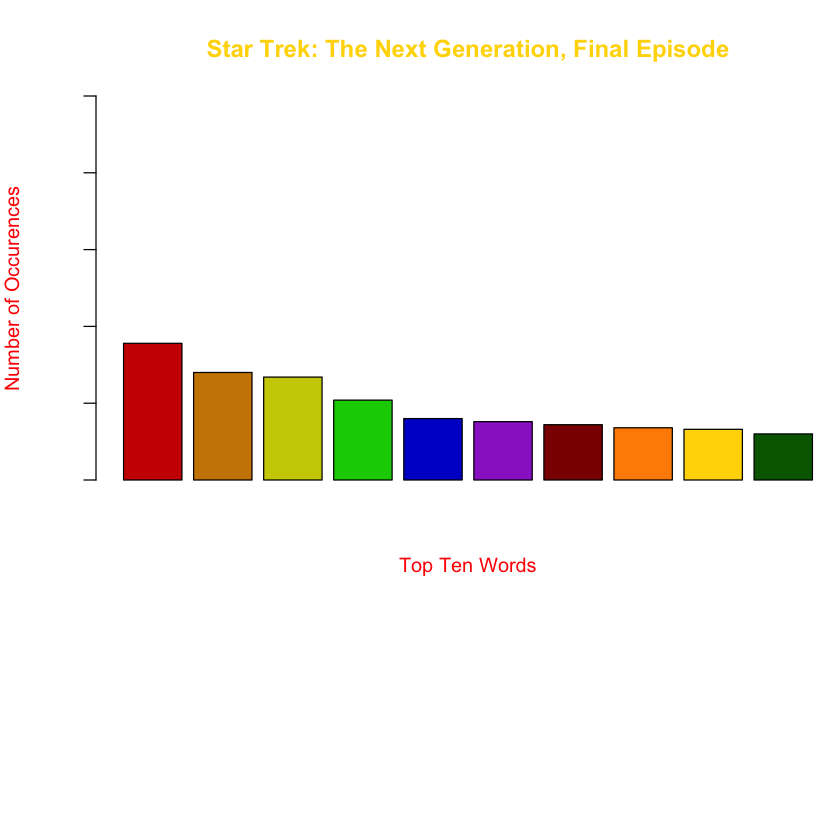

In [37]:
par(mar=c(15,4,4,0))
barplot(head(freq, 10), ylim=c(0,250), col=c("red3", "orange3","yellow3","green3","blue3","darkorchid3","darkred", "darkorange", "gold", "darkgreen"), col.main="Gold", col.lab="red", col.axis="white", las=2,
     main="Star Trek: The Next Generation, Final Episode", xlab="Top Ten Words", ylab="Number of Occurences", xaxt="s")
            